# Curve fitting

Marcos Duarte

Curve fitting is the process of fitting a model, expressed in terms of a mathematical function, that depends on adjustable parameters to a series of data points and once adjusted, that curve has the best fit to the data points.   

The model can be an arbitrary class of functions such as polynomials and the fit would determine the polynomial coefficients to simplily summarize the data or the model parameters can represent a underlying theory that the data are supposed to satisfy such as fitting an exponential function to data of a decay process to determine its decay rate or a parabola to the position data of an object falling to determine the gravity acceleration.

The general approach to the fitting procedure involves the definition of a merit function that measures the agreement between data and model. The model parameters are then adjusted to yield the best-fit parameters as a problem of minimization. A fitting procedure should provide (i) parameters, (ii) error estimates on the parameters, and (iii) a statistical measure of goodness-of-fit. When the third item suggests that the model is an unlikely match to the data, then items (i) and (ii) are probably worthless.   
(Numerical Recipes 2007, Bevington and Robinson 2002)

## Least squares

Consider $ n $ data points $(x_i, y_i),\: i=1, \dots , n$, where $x_i$ is the independent variable (or predictor) and $y_i$ is the dependent variable (or response) to be fitted by a model function $y$ with $m$ adjustable parameters $\beta_i,\: i=1, \dots , m$. The problem is to find the parameter values for the model which best fits the data. A classical solution is to find the best fit by minimizing the sum of the squared differences between data points and the model function (the sum of squared residuals as the merit function), which is known as the least-squares fit:

$$ \sum_{i=1}^{n} \left[ y_i - y(x | \beta_1 \dots \beta_{m}) \right]^2 \;\;\;\;\;\; \mathrm{minimize\; over:} \;\;\; \beta_1 \dots \beta_{m} $$ 

**Chi-Square**   
If we consider that each response $y_i$ has a measurement error or uncertainty described by a standard deviation, $ \sigma_i $, the problem now is to minimize the following function:

$$ \sum_{i=1}^{n} \left[ \frac{ y_i - y(x | \beta_1 \dots \beta_{m}) }{\sigma_i} \right]^2 = \chi^2 $$

Considering that the residuals are normally distributed, the sum of squared residuals divided by their variance, $\sigma_i^2$, by definition will have a [chi-squared distribution](http://en.wikipedia.org/wiki/Chi-squared_distribution), $ \chi^2 $. Once the best-fit parameters are found, the terms in the sum above are not all statistically independent and the probability distribution of $\chi^2$ will be the chi-squared distribution for $n-m$ degrees of freedom.

The uncertainty $\sigma_i$ can be seen as the inverse of the weights in a weighted sum (because less certainty we have about this measure). Larger $\sigma_i$, smaller the weight of $y_i$ in the sum. If $y_i$ has no uncertainty, $\sigma_i$ should be equal to one.   

A rough estimate of the goodness of fit is the reduced chi-square statistic, $\chi^2_{red}$: the $\chi^2$ value divided by the number of degrees of freedom ($n-m$).   
A good fitting should have $\chi^2_{red}$ equals to one.

## Linear fit

Let's derive the analytical expression for the least-square fit when the model function is a straight line (a.k.a. linear regression) and the dependent variable $y_i$ has uncertainty:

$$ y(x) = y(x | a,b) = a + bx $$ 

We want to find $a, b$ such that minimizes the $\chi^2$ function defined above (a.k.a. $\chi^2$ fitting):

$$ \chi^2(a,b) = \sum_{i=1}^{n} \left[ \frac{ y_i - (a + bx_i) }{\sigma_i} \right]^2 $$

Using the property that at the minimum of $\chi^2$ its derivative is zero:

$$ \frac{\partial \chi^2}{\partial a} = -2 \sum_{i=1}^{n} \frac{ y_i - a - bx_i }{\sigma_i^2} = 0 $$

$$ \frac{\partial \chi^2}{\partial b} = -2 \sum_{i=1}^{n} \frac{ x_i(y_i - a - bx_i) }{\sigma_i^2} = 0 $$

To solve these two equations, let's define the sums as:

$$ S = \sum_{i=1}^{n} \frac{1}{\sigma_i^2} \;\;\; S_x = \sum_{i=1}^{n} \frac{x_i}{\sigma_i^2} \;\;\; S_y = \sum_{i=1}^{n} \frac{y_i}{\sigma_i^2} \;\;\; S_{xx} = \sum_{i=1}^{n} \frac{x_i^2}{\sigma_i^2} \;\;\; S_{xy} = \sum_{i=1}^{n} \frac{x_i y_i}{\sigma_i^2} $$

Using these definitions, the former two equations become:

$$ S_y \:\: = aS + bS_x $$

$$ S_{xy} = aS_x + bS_{xx} $$

And solving these two equations for the two unknowns:

$$ a = \frac{S_{xx}S_y - S_x S_{xy}}{\Delta} $$

$$ b = \frac{S S_{xy} - S_x S_y}{\Delta} $$  

Where:

$$ \Delta = S S_{xx} - S_x^2 $$

With the parameters above, the straight line will be the best fit in the sense that the sum of the squared residuals are minimum.   

**Estimating the uncertainty of the parameters**

The uncertainty of each parameter is given by:

$$ \sigma_a^2 = \frac{Sxx}{\Delta} $$

$$ \sigma_b^2 = \frac{S}{\Delta} $$

## Correlation coefficient

The Pearson product-moment correlation coefficient, or simply the correlation coefficient, is a measure of the linear correlation between two variables $x$ and $y$, with values varying from +1 to −1, where 1 is total positive correlation, 0 is no correlation, and −1 is total negative correlation.   
The correlation coefficient between populations of two random variables is the covariance of the two variables divided by the product of their standard deviations:

$$ \rho_{x, y} = \frac{cov(x, y)}{\sigma_x\sigma_y} = \frac{E[(x-\mu_x)(y-\mu_y)]}{\sqrt{E[(x-\mu_x)^2]}\sqrt{E[(y-\mu_y)^2]}} $$ 

Where $ E[\cdot] $ is the <a href="http://en.wikipedia.org/wiki/Moment_(mathematics)">expectation operator</a>.

For samples of two random variables, the covariance and standard deviation are given by:

$$ cov(x, y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) $$

$$ \sigma_x = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2} $$

So, the correlation coefficient for the samples is:

$$ r_{x, y} = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}} $$

The square of the sample correlation coefficient, denoted $r^2$ or $R^2$, is called the coefficient of determination and it can be shown it is related to the linear fit formalism by:

$$ R^2(y, \widehat{y}) = \frac{\sum_{i=1}^{n}(\widehat{y}_i-\bar{y})^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$$

Where $\widehat{y}_i$ are the fitted values from the linear fit.

Examining the division above, it consists of the variance of the fitted values around the mean value of $y$ divided by the variance of $y_i$. Because of that, it is said that the coefficient of determination is the proportion of variance in $y$ explained by a linear function of $x$.

## Computing the curve fitting

Python and its ecosystem for scientific computing have plenty of functions ready available for curve fitting. Instead of writting our own code to implement the formula above, let's use the functions available which will cover many more cases (general polynomials, nonlinear functions, etc.).

First, if we only want to fit polynomials, we can use the Numpy polyfit function:   

    polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)   
        Least squares polynomial fit.   
        
        Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`   
        to points `(x, y)`. Returns a vector of coefficients `p` that minimises   
        the squared error.  
        
Let's demonstrate how polyfit works:

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

Generate some data:

In [2]:
n = 50
x = np.arange(1, n+1)
y = x + 10*np.random.randn(n) + 10
yerr = np.abs(10*np.random.randn(n)) + 5

First, let's plot the data and perform the curve fitting without considering the uncertainty:

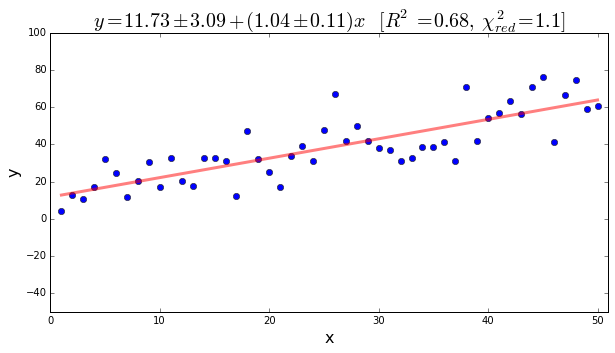

In [3]:
p, cov = np.polyfit(x, y, 1, cov=True)  # coefficients and covariance matrix
yfit = np.polyval(p, x)                 # evaluate the polynomial at x

perr = np.sqrt(np.diag(cov))       # standard-deviation estimates for each coefficient
R2 = np.corrcoef(x, y)[0, 1]**2    # coefficient of determination between x and y
resid = y - yfit
chi2red = np.sum((resid/yerr)**2)/(y.size - 2)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'bo')
plt.plot(x, yfit, 'r', linewidth=3, color=[1, 0, 0, .5])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('$y = %.2f \pm %.2f + (%.2f \pm %.2f)x \; [R^2=%.2f,\, \chi^2_{red}=%.1f]$'
          %(p[1], perr[1], p[0], perr[0], R2, chi2red), fontsize=20, color=[0, 0, 0])  
plt.xlim((0, n+1))
plt.ylim((-50, 100))
plt.show()

The curve fitting by a line considering the uncertainty:

In [4]:
p, cov = np.polyfit(x, y, 1, w=1/yerr, cov=True)  # coefficients and covariance matrix
yfit = np.polyval(p, x)          # evaluate the polynomial at x

perr = np.sqrt(np.diag(cov))     # standard-deviation estimates for each coefficient
R2 = np.corrcoef(x, y)[0, 1]**2  # coefficient of determination between x and y
resid = y - yfit
chi2red = np.sum((resid/yerr)**2)/(y.size - 2)

And the plot:

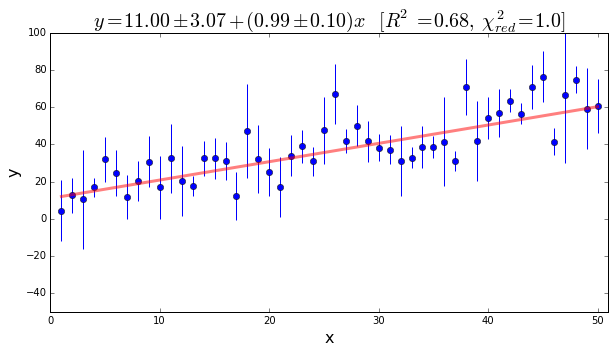

In [5]:
plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr=yerr, fmt = 'bo', ecolor='b', capsize=0)
plt.plot(x, yfit, 'r', linewidth=3, color=[1, 0, 0, .5])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('$y = %.2f \pm %.2f + (%.2f \pm %.2f)x \; [R^2=%.2f,\, \chi^2_{red}=%.1f]$'
          %(p[1], perr[1], p[0], perr[0], R2, chi2red), fontsize=20, color=[0, 0, 0])  
plt.xlim((0, n+1))
plt.ylim((-50, 100))
plt.show()

According to our assumptions, the residuals should be normally distributed.  Let's create a function to plot the residuals and a probability plot that will be useful to check if the residuals are normally distributed:

In [6]:
def plot_resid(x, resid):
    """ plot residuals and probability plot of residuals for a normal distribution."""
    
    import matplotlib.pyplot as plt
    import scipy.stats as stats
    fig, ax = plt.subplots(1, 2, figsize=(13, 5))
    ax[0].plot(x, resid, 'ro')
    ax[0].plot([0, x[-1]], [0, 0], 'k')
    ax[0].set_xlabel('x', fontsize=12)
    ax[0].set_ylabel('Residuals', fontsize=12)
    stats.probplot(resid, dist="norm", plot=plt)
    ax[1].set_xlabel('Quantiles', fontsize=12)
    ax[1].set_ylabel('Ordered values', fontsize=12)
    ax[1].set_title('Probability Plot of the residuals')
    
    plt.show()

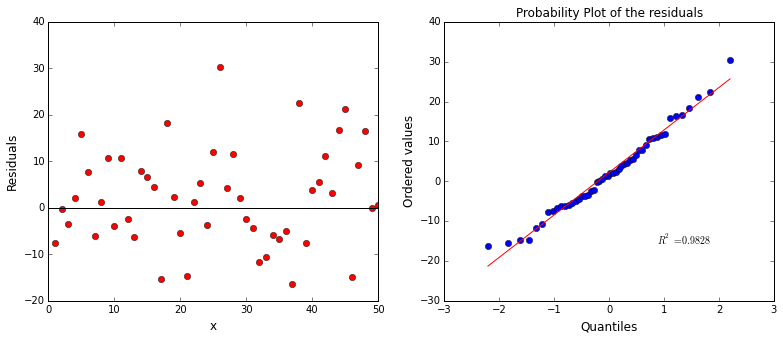

In [7]:
plot_resid(x, resid)

We could apply a statistical test to verify if the data above is normallly distributed, but for now, by visual inspection, the residuals indeed seem to be normallly distributed.

### The effect of uncertainty on the curve fitting

To demonstrate the effect of uncertainty on the curve fitting, let's plot the same (x, y) values but with different errors:

In [8]:
# data
x    = np.array([1, 2, 3, 4, 5])
y    = np.array([1, 2, 3, 6, 4])
yerr = np.array([[0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 1],
                 [1, 1, 1, .5, 2],
                 [1, 1, 1, 2, .5]])

In [9]:
# function for the linear fit to automate the process
def linearfit(x, y, yerr=None):
    w = None if (yerr is None or np.sum(yerr)==0) else 1/yerr
    p, cov = np.polyfit(x, y, 1, w=w, cov=True)  # coefficients and covariance matrix
    yfit = np.polyval(p, x)          # evaluate the polynomial at x
    
    perr = np.sqrt(np.diag(cov))     # standard-deviation estimates for each coefficient
    R2 = np.corrcoef(x, y)[0, 1]**2  # coefficient of determination between x and y
    resid = y - yfit
    chi2red = np.sum((resid/yerr)**2)/(y.size - 2) if w is not None else np.nan
    
    return yfit, p, R2, chi2red, perr, resid

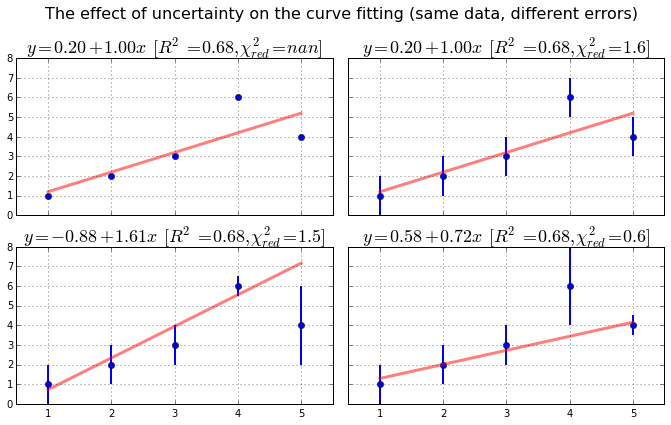

In [10]:
# plot
fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
axs = ax.flatten()
for i, ax in enumerate(axs):
    yf, p, R2, chi2red, perr, resid = linearfit(x, y, yerr=yerr[i, :])
    ax.errorbar(x, y, yerr=yerr[i, :], fmt = 'bo', ecolor='b', capsize=0, elinewidth=2)
    ax.plot(x, yf, 'r', linewidth=3, color=[1, 0, 0, .5])
    ax.set_title('$y = %.2f + %.2f x \, [R^2=%.2f,\chi^2_{red}=%.1f]$'
                   %(p[1], p[0], R2, chi2red), fontsize=18)  
    ax.grid()

ax.set_xlim(0.5, 5.5)
fig.subplots_adjust(bottom=0.1, left=.05, right=.95, hspace=.2, wspace=.05)
plt.suptitle('The effect of uncertainty on the curve fitting (same data, different errors)',
             fontsize=16, y=1.02)
plt.show()

From figure above, if the errors (weights) are all equal, the fitting is the same as if we don't input any error (first line).   
When the errors are different across data, the uncertainty has a strong impact on the curve fitting (second line).

## Curve fitting as a model

We have to be carefull in interpreting the results of a curve fitting to determine whether the fitted model truely captures the relation between the independent variable (predictor) and the dependent variable (response).

An illustrative example to demonstrate that the result of a curve fitting is not necessarily an indicator of the phenomenon being modelled is the [Anscombe's quartet](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) data. These four sets of data have very similar basic statistical properties and linear fitting parameters, but are very different when visualized. Let's work with these data:

In [11]:
# Anscombe's quartet data
x =  np.array([[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
               [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
               [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
               [8,  8,  8, 8,  8,  8, 8, 19, 8, 8, 8]])
y = np.array([[8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
              [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
              [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
              [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]])
# basic descriptive statistics
print("The Anscombe's quartet data ha)ve the same basic statistical properties:")
print('Mean of x    :', np.mean(y, axis=1))
print('Variance of x:', np.var(y, axis=1))
print('Mean of y    :', np.mean(y, axis=1))
print('Variance of y:', np.var(y, axis=1))

The Anscombe's quartet data ha)ve the same basic statistical properties:
Mean of x    : [ 7.50090909  7.50090909  7.5         7.50090909]
Variance of x: [ 3.75206281  3.75239008  3.74783636  3.74840826]
Mean of y    : [ 7.50090909  7.50090909  7.5         7.50090909]
Variance of y: [ 3.75206281  3.75239008  3.74783636  3.74840826]


Or we can use Pandas to describe the data:

In [12]:
import pandas as pd
df = pd.DataFrame(np.vstack((x, y)).T, columns=['X1', 'X2', 'X3', 'X4', 'Y1', 'Y2', 'Y3', 'Y4'])
df.describe()

,X1,X2,X3,X4,Y1,Y2,Y3,Y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


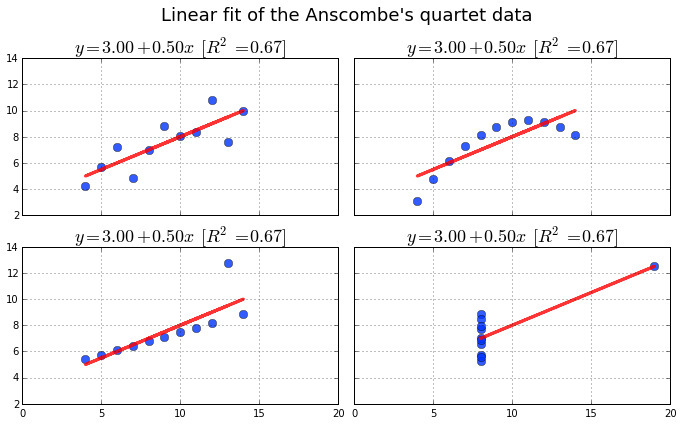

In [13]:
# plot
fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
axs = ax.flatten()
resid = np.empty_like(y)
for i, ax in enumerate(axs):
    yf, p, R2, chi2red, perr, resid[i, :] = linearfit(x[i, :], y[i, :], yerr=None)
    ax.plot(x[i, :], y[i, :], color=[0, .2, 1, .8], marker='o', linestyle='', markersize=8)
    ax.plot(x[i, :], yf, 'r', linewidth=3, color=[1, 0, 0, .8])
    ax.set_title('$y = %.2f + %.2f x \, [R^2=%.2f]$' %(p[1], p[0], R2), fontsize=18)  
    ax.grid()

ax.set_xlim(0, 20)
fig.subplots_adjust(bottom=0.1, left=.05, right=.95, hspace=.2, wspace=.05)
plt.suptitle("Linear fit of the Anscombe's quartet data",
             fontsize=18, y=1.02)
plt.show()

And we can check whether the residuals of the linear fit are normally distributed:

C:\Miniconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


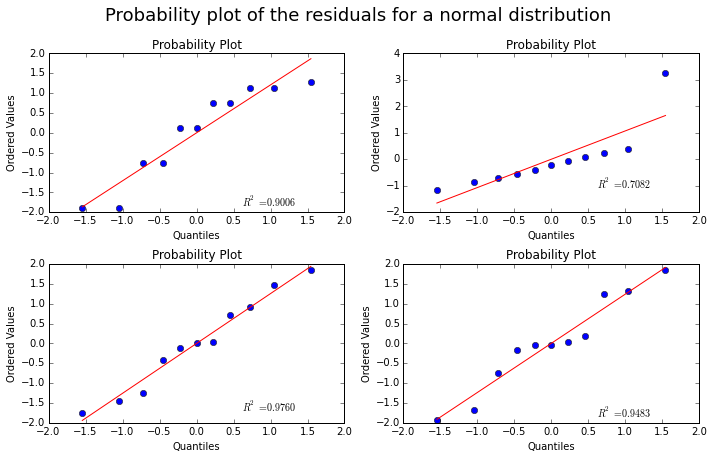

In [14]:
fig = plt.figure(figsize=(10, 6))
for i in range(4):
    ax = plt.subplot(2, 2, i)
    stats.probplot(resid[i, :], dist="norm", plot=plt)
    
plt.suptitle('Probability plot of the residuals for a normal distribution',
             fontsize=18, y=1.05)
plt.tight_layout()
plt.show()

Even the residuals don't look bad!  
Exactly the same model fits very different data.   
We should be very carefull in interpreting the result of a curve fitting as a description of a phenomenon.

## Confidence and prediction intervals for the linear fit

Analog to the case for a random variable (see [Confidence and prediction intervals](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/ConfidencePredictionIntervals.ipynb)), we can estimate confidence and prediction intervals for the linear fit (for the deduction of these intervals see for example Montgomery (2013)).   

**Confidence interval**   

A 95% confidence interval for the linear fit gives the 95% probability that this interval around the linear fit, $\hat{\mu}_{y|x0}$, contains the mean response of new values, $\mu_{y|x0}$, at a specified value, $x_0$, and it is given by:

$$ \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}$$

Where:  

$ \hat{\mu}_{y|x0} = a + bx_0$ is computed from the lineat fit.   

$T_{n-2}^{.975}$ is the $97.5^{th}$ percentile of the Student's t-distribution with n−2 degrees of freedom.   

$\hat{\sigma}$ is the standard deviation of the error term in the linear fit (residuals) given by:

$$ \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}} $$

**Prediction interval**   

A 95% prediction interval for the linear fit gives the 95% probability that this interval around the linear fit, $\hat{y}_0$, contains a new observation, $y_0$, at a specified value, $x_0$, and it is given by:

$$ \left| \: \hat{y}_0 - y_0 \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{1 + \frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}$$

Where $ \hat{y}_0 = a + bx_0$ is computed from the lineat fit.

**Implementation in Python**

Here is an implementation of the linear fit with the confidence and prediction intervals:

In [15]:
def linearfit(x, y, yerr):
    """Linear fit of x and y with uncertainty and plots results."""
    
    import numpy as np
    import scipy.stats as stats
    
    x, y = np.asarray(x), np.asarray(y)
    n = y.size
    p, cov = np.polyfit(x, y, 1, w=1/yerr, cov=True)  # coefficients and covariance matrix
    yfit = np.polyval(p, x)                           # evaluate the polynomial at x
    perr = np.sqrt(np.diag(cov))     # standard-deviation estimates for each coefficient
    R2 = np.corrcoef(x, y)[0, 1]**2  # coefficient of determination between x and y
    resid = y - yfit
    chi2red = np.sum((resid/yerr)**2)/(n - 2)  # Chi-square reduced
    s_err = np.sqrt(np.sum(resid**2)/(n - 2))  # stamdard deviation of the error (residuals)
    
    x2 = np.linspace(np.min(x), np.max(x), 100)
    y2 = np.linspace(np.min(yfit), np.max(yfit), 100)
    # Confidence interval for the linear fit:
    t = stats.t.ppf(0.975, n - 2)
    ci = t * s_err * np.sqrt(    1/n + (x2 - np.mean(x))**2/np.sum((x-np.mean(x))**2))
    # Prediction interval for the linear fit:
    pi = t * s_err * np.sqrt(1 + 1/n + (x2 - np.mean(x))**2/np.sum((x-np.mean(x))**2))

    # Plot
    plt.figure(figsize=(10, 5))
    plt.fill_between(x2, y2+pi, y2-pi, color=[1, 0, 0, 0.1], edgecolor='')
    plt.fill_between(x2, y2+ci, y2-ci, color=[1, 0, 0, 0.15], edgecolor='')
    plt.errorbar(x, y, yerr=yerr, fmt = 'bo', ecolor='b', capsize=0)
    plt.plot(x, yfit, 'r', linewidth=3, color=[1, 0, 0, .8])
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.title('$y = %.2f \pm %.2f + (%.2f \pm %.2f)x \; [R^2=%.2f,\, \chi^2_{red}=%.1f]$'
              %(p[1], perr[1], p[0], perr[0], R2, chi2red), fontsize=20, color=[0, 0, 0])  
    plt.xlim((0, n+1))
    plt.show()

And an example:

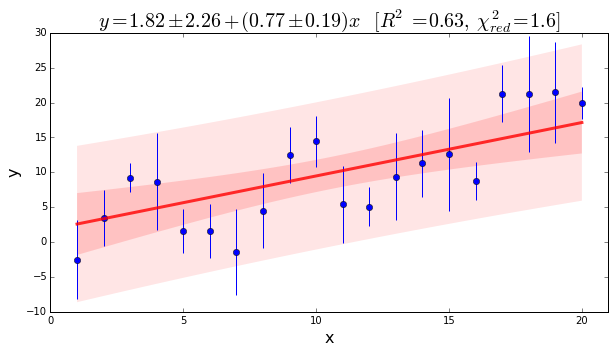

In [16]:
n = 20
x = np.arange(1, n+1)
y = x + 5*np.random.randn(n)
yerr = np.abs(4*np.random.randn(n)) + 2
linearfit(x, y, yerr)

### Non-linear curve fitting

A more general curve fitting function is the `scipy.optimize.curve_fit`:

    scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, **kw)[source]
        Use non-linear least squares to fit a function, f, to data.
        
For the `curve_fit` funcion, we need to define a model (e.g., a mathematical expression) for the fit:

    f : callable
    The model function, f(x, ...). It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments.
    
Let's create a gaussian curve as model:

In [17]:
# Import the necessary libraries
import numpy as np
from scipy.optimize import curve_fit
from IPython.display import display, Math
import matplotlib.pyplot as plt
%matplotlib inline

Define the function for curve fitting:

In [18]:
def func(x, a, b, c, d):
    # Gauss function
    return a*np.exp(-(x-b)**2/(2*c**2)) + d

display(Math( r'y = a * exp\left(-\frac{(x-b)^2}{2c^2}\right) + d' ))

<IPython.core.display.Math object>

Generate numeric data to be fitted:

In [19]:
x = np.linspace(0, 8, 101)
noise = np.random.randn(len(x)) + 1
y = func(x, 10, 4, 1, np.mean(noise)) + noise
yerr = np.abs(np.random.randn(len(x))) + 1

Perform the curve fitting:

In [20]:
p, cov = curve_fit(func, x, y, sigma=yerr)
yfit = func(x, p[0], p[1], p[2], p[3])
perr = np.sqrt(np.diag(cov))       # standard-deviation estimates for each coefficient
resid = y - yfit
chi2red = np.sum((resid/yerr)**2)/(y.size - 3)

print('Fitted parameters:')
display(Math( r'a=%.2f \pm %.2f'   %(p[0], perr[0]) ))
display(Math( r'b=%.2f \pm %.2f'   %(p[1], perr[1]) ))
display(Math( r'c=%.2f \pm %.2f'   %(p[2], perr[2]) ))
display(Math( r'd=%.2f \pm %.2f'   %(p[3], perr[3]) ))
display(Math( r'\chi^2_{red}=%.2f' %(chi2red) ))

Fitted parameters:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Plot data and fitted curve:

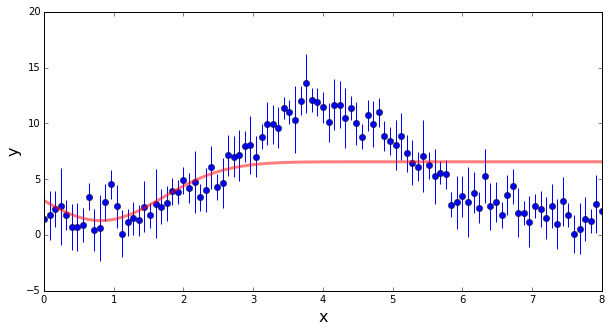

In [21]:
plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr=yerr, fmt = 'bo', ecolor='b', capsize=0)
plt.plot(x, yfit, 'r', linewidth=3, color=[1, 0, 0, .5])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

Evidently this is not correct.

We need to enter an initial guess for the parameters (`p0`):

Fitted parameters:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

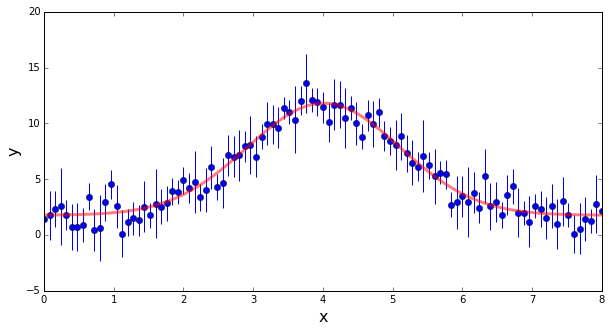

In [22]:
p, cov = curve_fit(func, x, y, p0=[1, 4, 1, 1], sigma=yerr)
yfit = func(x, p[0], p[1], p[2], p[3])
perr = np.sqrt(np.diag(cov))       # standard-deviation estimates for each coefficient
resid = y - yfit
chi2red = np.sum((resid/yerr)**2)/(y.size - 3)

print('Fitted parameters:')
display(Math( r'a=%.2f \pm %.2f'   %(p[0], perr[0]) ))
display(Math( r'b=%.2f \pm %.2f'   %(p[1], perr[1]) ))
display(Math( r'c=%.2f \pm %.2f'   %(p[2], perr[2]) ))
display(Math( r'd=%.2f \pm %.2f'   %(p[3], perr[3]) ))
display(Math( r'\chi^2_{red}=%.2f' %(chi2red) ))

plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr=yerr, fmt = 'bo', ecolor='b', capsize=0)
plt.plot(x, yfit, 'r', linewidth=3, color=[1, 0, 0, .5])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()

Once again, according to our assumptions, the residuals should be normally distributed:

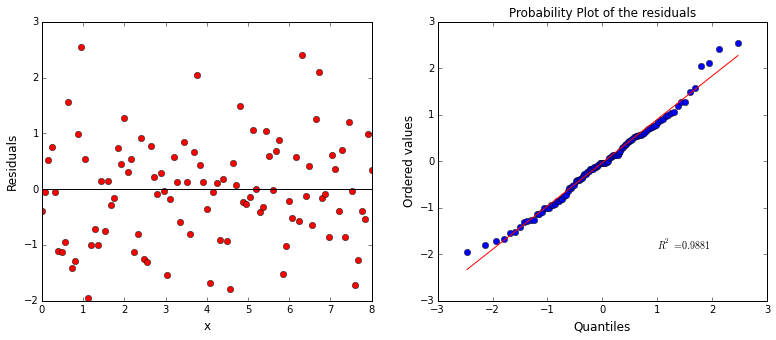

In [23]:
plot_resid(x, resid)

## References

- [Bevington and Robinson (2002) Data Reduction and Error Analysis for the Physical Science. McGraw-Hill Science/Engineering/Math; 3rd edition](https://www.mcgraw-hill.co.uk/html/0071199268.html).
- [Press et al. (2007) Numerical Recipes 3rd Edition: The Art of Scientific Computing. Cambridge University Press](http://www.nr.com/).  
- [Montgomery (2013) Applied Statistics and Probability for Engineers. John Wiley & Sons](http://books.google.com.br/books?id=_f4KrEcNAfEC).
- [NIST/SEMATECH e-Handbook of Statistical Methods](http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm)